# What should I use for upsampling ?

In Keras, *Conv3D* and *Conv3DTranspose* are two different types of layers that can be used in a convolutional neural network.

Conv3D is a 3D convolutional layer that performs a convolution operation on the input volume using a set of learnable filters. The output of a Conv3D layer has the same spatial dimensions as the input, but the depth (i.e., number of channels) may be different.

On the other hand, Conv3DTranspose is a 3D transposed convolutional layer that performs an operation similar to "deconvolution". It takes the input with a smaller spatial resolution and a larger number of channels and applies a learnable upsampling process to increase the spatial dimensions while decreasing the depth (i.e., number of channels). Conv3DTranspose can be used for upsampling feature maps or generating high-resolution images from a low-resolution input.

In other words, Conv3D is used for downsampling (or feature extraction), while Conv3DTranspose is used for upsampling (or feature map reconstruction).

Let's see a 2D example, with keras Conv2DTranspose layer, that makes no real prediction but explains a lot ! To demonstrate how the Conv2DTranspose layer works let's start by creating a simple 2D image and passing it through a Conv2DTranspose layer:

In [19]:
def grid_ticks(ax, nticks):
    ax = plt.gca();

    # Major ticks
    ax.set_xticks(np.arange(0, nticks, 1))
    ax.set_yticks(np.arange(0, nticks, 1))

    # Labels for major ticks
    ax.set_xticklabels(np.arange(1, nticks+1, 1))
    ax.set_yticklabels(np.arange(1, nticks+1, 1))

    # Minor ticks
    ax.set_xticks(np.arange(-.5, nticks, 1), minor=True)
    ax.set_yticks(np.arange(-.5, nticks, 1), minor=True)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    # Remove minor ticks
    ax.tick_params(which='minor', bottom=False, left=False)
    return ax

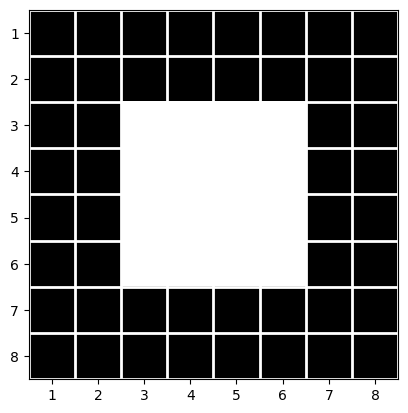

1/1 [==============================] - 0s 60ms/step


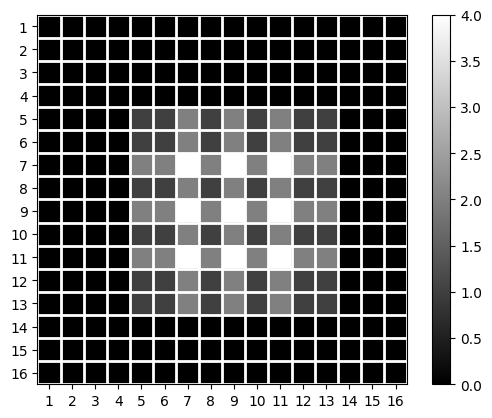

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2DTranspose
from keras.models import Sequential

# Create a simple 2D image
image = np.zeros((8, 8))
image[2:6, 2:6] = 1
plt.imshow(image, cmap='gray')

ax = plt.gca();
ax = grid_ticks(ax,8)

plt.show()

# Define a transposed convolutional layer
model = Sequential()
model.add(Conv2DTranspose(1, kernel_size=3, strides=2, 
                          padding='same', input_shape=(8, 8, 1),
                          kernel_initializer='ones'))

# Apply the transposed convolution to the image
image = image.reshape((1, 8, 8, 1))
output = model.predict(image)
output = output.reshape((16, 16))
plt.imshow(output, cmap='gray')

ax = plt.gca();
ax = grid_ticks(ax,16)

plt.colorbar()
plt.show()

Can you see the deconvolution pattern ?

### kernel initialisation

Another interesting feature of the code we have just seen is that the kernel is initialised to 1, are there other ways to initialise the kernel values ?

In Keras, you can initialize a layer by passing an initializer to the kernel_initializer or bias_initializer argument when creating the layer. Keras provides several built-in initializers, including:

- zeros: Initializes weights or biases to all zeros
- ones: Initializes weights or biases to all ones
- constant: Initializes weights or biases to a constant value
- random_normal: Initializes weights or biases with random values drawn from a normal distribution
- random_uniform: Initializes weights or biases with random values drawn from a uniform distribution
- glorot_normal or glorot_uniform: Initializes weights with random values drawn from a uniform or normal distribution, with the standard deviation scaled based on the number of input and output units.

For example, to create a Dense layer with weights initialized to random values drawn from a normal distribution with mean 0 and standard deviation 0.01, you can use the following code:

```
from keras.layers import Dense
from keras.initializers import RandomNormal

dense_layer = Dense(units=64, kernel_initializer=RandomNormal(mean=0.0, stddev=0.01))
```

You can also create a custom initializer by subclassing the keras.initializers.Initializer class and implementing its **__call__** method. Here's an example of a custom initializer that initializes weights with random values drawn from a truncated normal distribution with mean 0 and standard deviation 0.01:

```
import tensorflow as tf
from keras.initializers import Initializer

class TruncatedNormal(Initializer):
    def __init__(self, mean=0.0, stddev=0.01):
        self.mean = mean
        self.stddev = stddev

    def __call__(self, shape, dtype=None):
        return tf.truncated_normal(shape, mean=self.mean, stddev=self.stddev)

```

You can then use this initializer in the same way as the built-in initializers:

```
dense_layer = Dense(units=64, kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.01))
```

# Upsampling

Instead of a convolutional transpose layer, you may want to use the upsampling layer (similar to the pooling layer). The Upsampling layer in Keras is used to increase the spatial dimensions (width and height) of the input feature maps. It is often used in combination with a previous pooling layer to restore the original spatial resolution of the input feature maps.

The Upsampling layer essentially repeats each pixel value in the input feature maps a certain number of times to increase the spatial resolution. There are two main types of upsampling layers in Keras: `UpSampling2D` and `UpSampling3D`. `UpSampling2D` is used for 2D images, while `UpSampling3D` is used for 3D volumetric data.

The `UpSampling2D` layer takes as input a tensor of shape `(batch_size, height, width, channels)`, where `batch_size` is the number of samples in a batch, `height` and `width` are the spatial dimensions of the input feature maps, and `channels` is the number of channels in the input feature maps. The layer outputs a tensor of shape `(batch_size, height * size_factor, width * size_factor, channels)`, where `size_factor` is the upsampling factor, which is a positive integer that specifies how much to increase the spatial dimensions.

The `UpSampling3D` layer takes as input a tensor of shape `(batch_size, depth, height, width, channels)`, where `batch_size` is the number of samples in a batch, `depth`, `height`, and `width` are the spatial dimensions of the input feature maps, and `channels` is the number of channels in the input feature maps. The layer outputs a tensor of shape `(batch_size, depth * size_factor, height * size_factor, width * size_factor, channels)`, where `size_factor` is the upsampling factor, which is a positive integer that specifies how much to increase the spatial dimensions.

The `UpSampling2D` and `UpSampling3D` layers use a nearest neighbor algorithm to perform the upsampling. Specifically, each pixel value in the input feature maps is repeated size_factor times in each spatial dimension to produce the output feature maps.

It's important to note that the Upsampling layer does not learn any parameters. It simply repeats the pixel values in the input feature maps to increase the spatial resolution. If you need to learn the upsampling, you can use the `Conv2DTranspose` or `Conv3DTranspose` layers, which learn to upsample the feature maps using trainable parameters.

Let's see what happens when using UpSampling2D layer instead of Conv2DTranspose to upsample a 2D image:

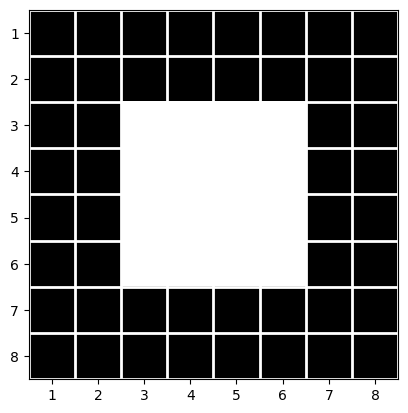

1/1 [==============================] - 0s 44ms/step


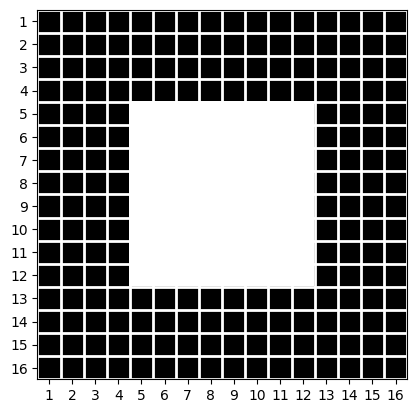

In [21]:
from keras.layers import UpSampling2D

# Create a simple 2D image
image = np.zeros((8, 8))
image[2:6, 2:6] = 1
plt.imshow(image, cmap='gray')

ax = plt.gca();
ax = grid_ticks(ax,8)

plt.show()

# Define an upsampling layer
model = Sequential()
model.add(UpSampling2D(size=(2, 2), input_shape=(8, 8, 1)))

# Apply the upsampling to the image
image = image.reshape((1, 8, 8, 1))
output = model.predict(image)
output = output.reshape((16, 16))
plt.imshow(output, cmap='gray')

ax = plt.gca();
ax = grid_ticks(ax,16)

plt.show()

In this example, we create the same 2D image as before and plot it using matplotlib.

Next, we define a Keras model with an UpSampling2D layer. This layer has a size of (2, 2), which doubles the dimensions of the input image in both dimensions. We also specify the input shape of the layer to match the shape of our input image.

We then reshape the input image to have a batch size of 1 and pass it through the UpSampling2D layer using the predict method. Finally, we reshape the output of the layer to be a 16x16 image and plot it using matplotlib.

The UpSampling2D layer performs an upsampling operation on the input image. In this example, the size of (2, 2) causes the output image to be twice as large in both dimensions as the input image.

Note that like Conv2DTranspose, UpSampling2D is often used in conjunction with other layers, such as convolutional and pooling layers, in deep learning models for image generation and inpainting. This example demonstrates the basic usage of the layer for upsampling purposes.